# **WeatherPy**

### **Importing Dependancies**

In [81]:
import gzip
import csv
import json
import pandas as pd
import random
import math
import numpy as np
from random import uniform
import matplotlib.pyplot as plt

import matplotlib

# Set style for plots
plt.style.use("seaborn")

In [82]:
import requests as req
from citipy import citipy

In [83]:
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
longs = np.random.uniform(low=-180.000, high=180.000, size=500)
cities=[]

In [84]:
for lat, long in zip(lats, longs):
    #print(lat,lang)
    cities.append(citipy.nearest_city(lat, long).city_name)


In [85]:
api_key = "c7f9f57b4779391ea1f5ae067591c971"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

#city = "London"
weather_data=[]

### **Generating URL**

In [86]:

for city in cities:
    try:
        #print("*",city,"*")
        #print(url + "appid=" + api_key + "&units=" + units + "&q=" + city)
        weather_data.append(req.get(query_url + city).json())
    except:
        print('error')

#for data in weather_data:
    #print(data.get('main').get('temp_max'))
#weather_data[2]

### **Setting variables**

In [87]:

temperature = [x for x in [data.get("main",{}).get("temp") for data in weather_data] if x is not None]
pressure = [x for x in [data.get("main",{}).get("pressure") for data in weather_data] if x is not None]
humidity = [x for x in [data.get("main",{}).get("humidity") for data in weather_data] if x is not None]
cloudiness=  [x for x in [data.get("clouds",{}).get("all") for data in weather_data] if x is not None]
wind_speed = [x for x in [data.get("wind",{}).get("speed") for data in weather_data] if x is not None]
latitude = [x for x in [data.get("coord",{}).get("lat") for data in weather_data] if x is not None]
Longitude = [x for x in [data.get("coord",{}).get("lon") for data in weather_data] if x is not None]
City_1 = [x for x in [data.get("name") for data in weather_data] if x is not None]
country = [x for x in [data.get("sys",{}).get("country") for data in weather_data] if x is not None]
#for temp,pre in zip(temperature,pressure):
 #   print(temp,pre)
#temperature = [x for x in temperature if x is not None]
#print(temperature)

In [88]:
citi_df = pd.DataFrame({"City":City_1,"Country":country,"lat":latitude,"long":Longitude,"Temperature":temperature,
                       "Pressure":pressure,"Humidity":humidity,"Cloudiness":cloudiness,
                        "Wind Speed":wind_speed
                       })
citi_df.set_index('City')
citi_df.head()

,City,Cloudiness,Country,Humidity,Pressure,Temperature,Wind Speed,lat,long
0,Saint-Philippe,75,CA,86,1012.00,-1.50,8.70,45.36,-73.48
1,Butaritari,56,KI,100,1020.54,28.18,3.43,3.07,172.79
2,Mataura,68,NZ,75,1005.79,21.68,4.23,-46.19,168.86
3,Bathsheba,40,BB,100,1014.00,22.00,4.60,13.22,-59.52
4,East London,40,ZA,94,1015.00,20.00,3.10,-33.02,27.91


### ** Plot settings**

In [89]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

### **Temperature vs Latitude**

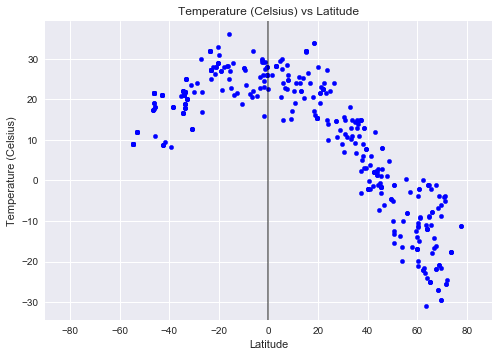

In [90]:
citi_df.plot(kind="scatter",x="lat",y="Temperature",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

### **Temperature vs Humidity**

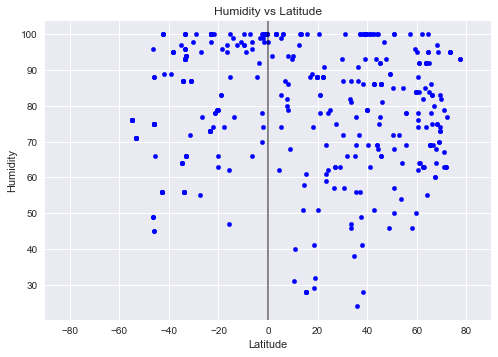

In [95]:
citi_df.plot(kind="scatter",x="lat",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

### **Cloudiness (%) vs. Latitude**

In [92]:
citi_df.plot(kind="scatter",x="lat",y="Cloudiness",grid=True,color="blue")

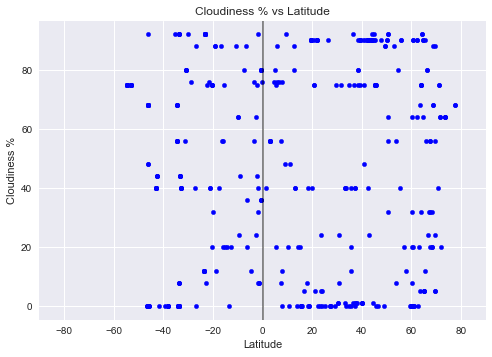

In [93]:
set_plot_prop("Latitude",[-90,90],"Cloudiness %")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness % vs Latitude")
plt.show()

### **Wind Speed(MPH) vs Latitude**

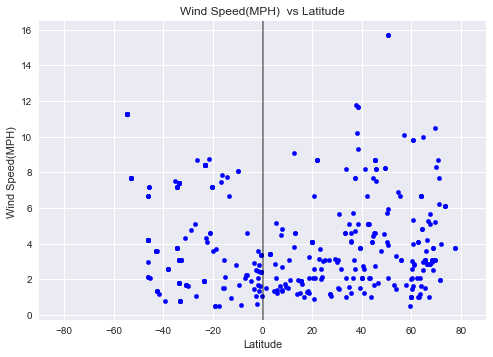

In [94]:
citi_df.plot(kind="scatter",x="lat",y="Wind Speed",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Wind Speed(MPH) ")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind Speed(MPH) vs Latitude")
plt.show()